In [11]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import seaborn as sns
#import pandas_gbp
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import import_ipynb
import covid_bigquery as cb

def fetch_exchange_rates():
    # Fetch exchange rate
    df_exchange_rates = pd.read_csv('exchangerates.csv', delimiter = ',')
    df_exchange_rates['date'] = df_exchange_rates['date'].map(lambda x: datetime.strptime(x, "%d/%m/%Y"))
    df_exchange_rates['rate'] = df_exchange_rates['rate'].map(lambda x: float(x))
    return df_exchange_rates
df_exchange_rates = fetch_exchange_rates()

In [5]:
covid19 = cb.Covid19()


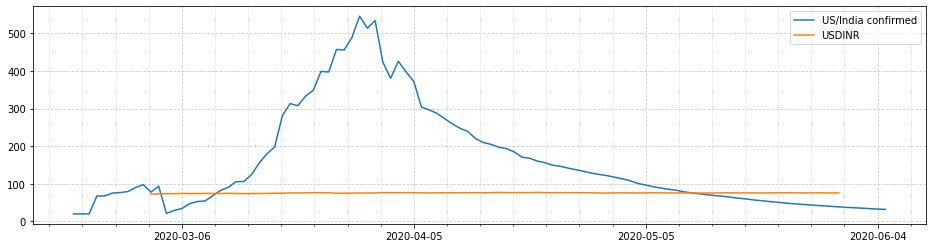

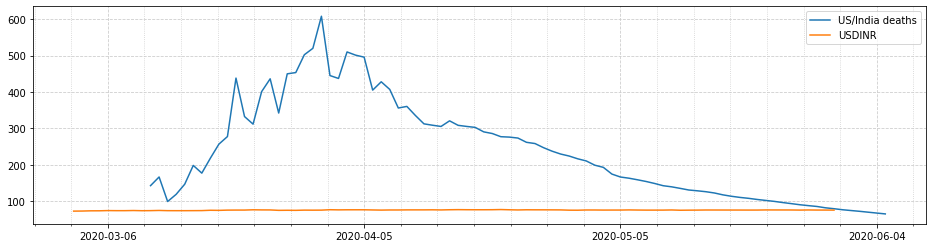

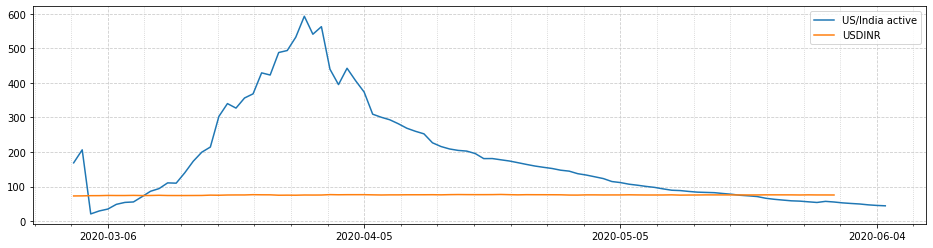

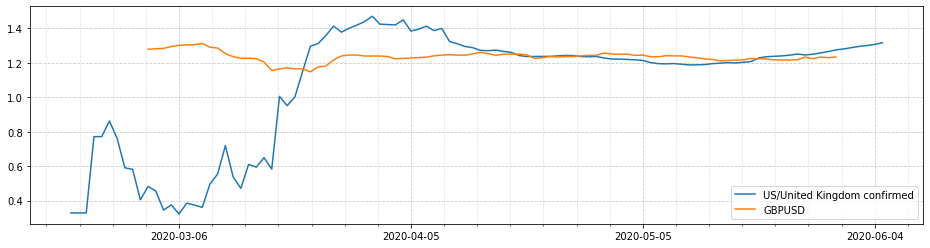

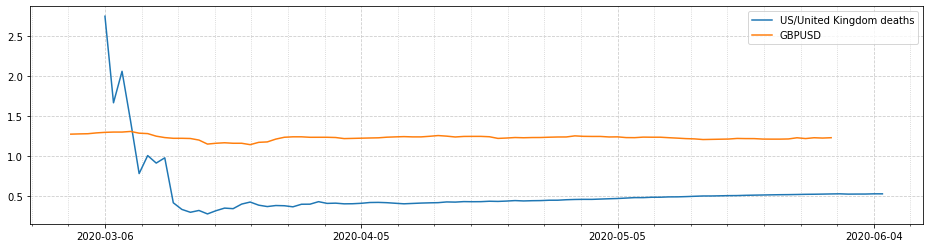

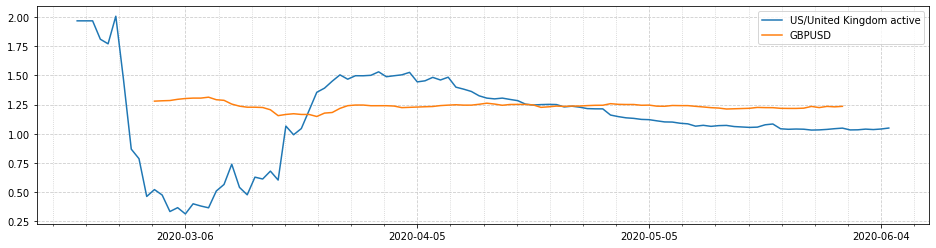

In [14]:
# Plots ratios calculated above, need to change this to pass column names
def covid_plot_ratio(df_covid, df_exchange_rates, country1, country2, type, exch_ratelabel):
    fig, ax = plt.subplots(figsize=(16,4))
    ax.plot(df_covid['date'], df_covid['ratio'], label="{0}/{1} {2}".format(country1, country2, type))
    df_tmp = df_exchange_rates[df_exchange_rates['code'] == exch_ratelabel]
    ax.plot(df_tmp['date'], df_tmp['rate'], label=exch_ratelabel)
    #ax.set_xlim(0, 200) - doesnt work with dates
    #ax.set_ylim(0, 10)
    ax.xaxis.set_major_locator(MultipleLocator(30))
    ax.xaxis.set_minor_locator(AutoMinorLocator(7))
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    ax.legend()
    plt.show()


def plot_covid_forex(df_covid_popl, df_exchange_rates, exchrate_code, country1, country2):
    df_ratio = covid_ratio_by_country(df_covid_popl, 'confirmed_per1m',   country1, country2)
    covid_plot_ratio(df_ratio, df_exchange_rates, country1, country2, 'confirmed', exchrate_code)

    df_ratio = covid_ratio_by_country(df_covid_popl, 'deaths_per1m',  country1, country2)
    covid_plot_ratio(df_ratio, df_exchange_rates, country1, country2, 'deaths', exchrate_code)

    df_ratio = covid_ratio_by_country(df_covid_popl, 'active_per1m',  country1, country2)
    covid_plot_ratio(df_ratio, df_exchange_rates, country1, country2, 'active', exchrate_code)

#df_exchange_rates['rate'][df_exchange_rates['code'] == exchrate_label] = df_exchange_rates['rate'][df_exchange_rates['code'] == exchrate_label]/35
plot_covid_forex(covid19.df_cumulative, df_exchange_rates, 'USDINR', 'US', 'India')
plot_covid_forex(covid19.df_cumulative, df_exchange_rates, 'GBPUSD', 'US', 'United Kingdom')


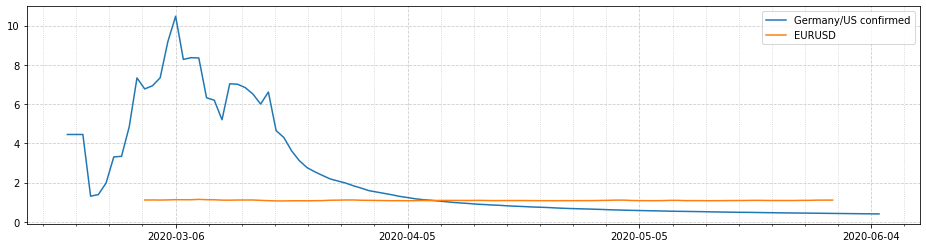

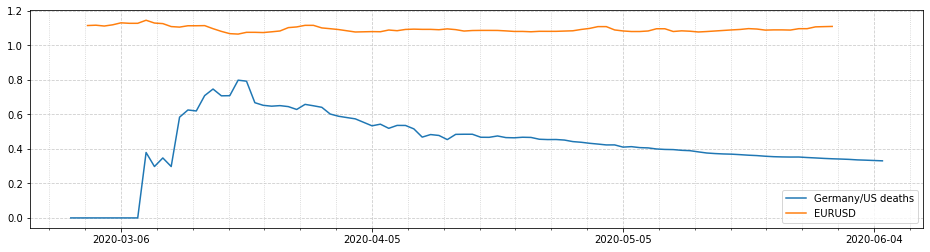

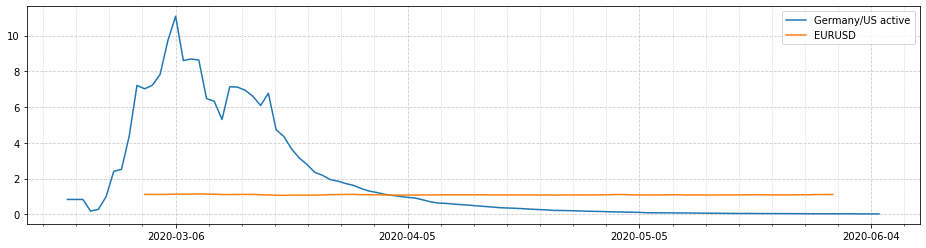

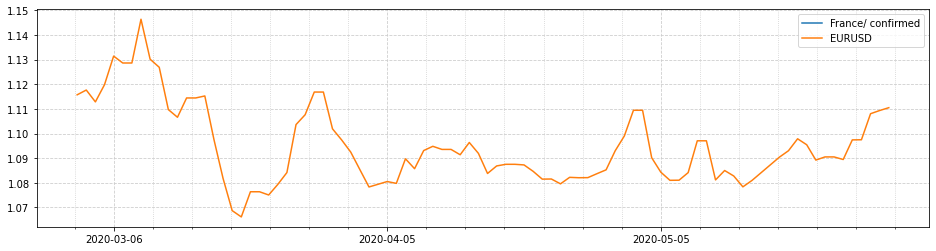

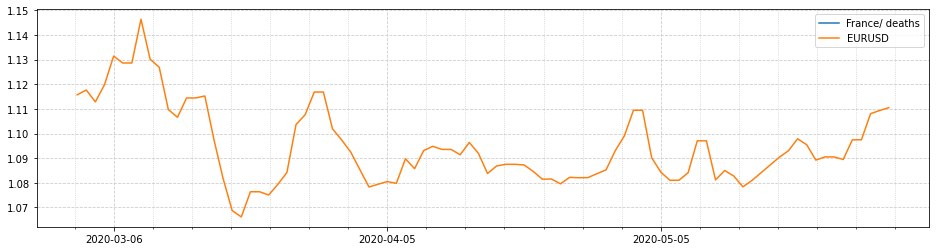

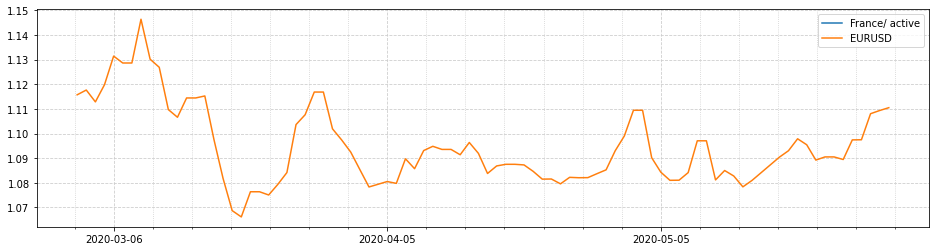

In [15]:
plot_covid_forex(covid19.df_cumulative, df_exchange_rates, 'EURUSD', 'Germany', 'US')
plot_covid_forex(covid19.df_cumulative, df_exchange_rates, 'EURUSD', 'France', '')


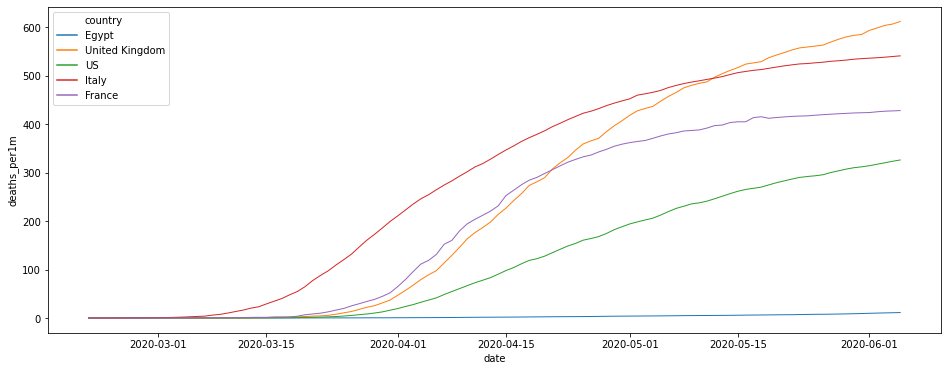

In [8]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="deaths_per1m", hue="country",
                  estimator=None, lw=1,
                  data=covid19.df_cumulative.query("country in ('US', 'United Kingdom', 'France', 'Italy', 'Egypt') "))

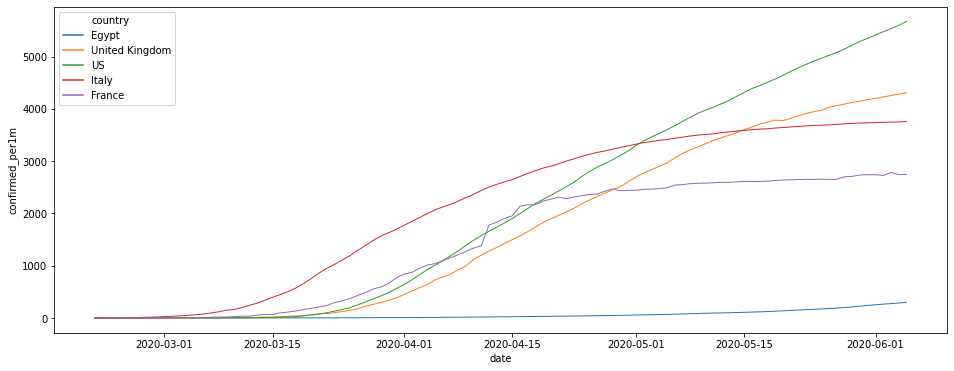

In [7]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="confirmed_per1m", hue="country",
                  estimator=None, lw=1,
                  data=covid19.df_cumulative.query("country in ('US', 'United Kingdom', 'France', 'Italy', 'Egypt') "))

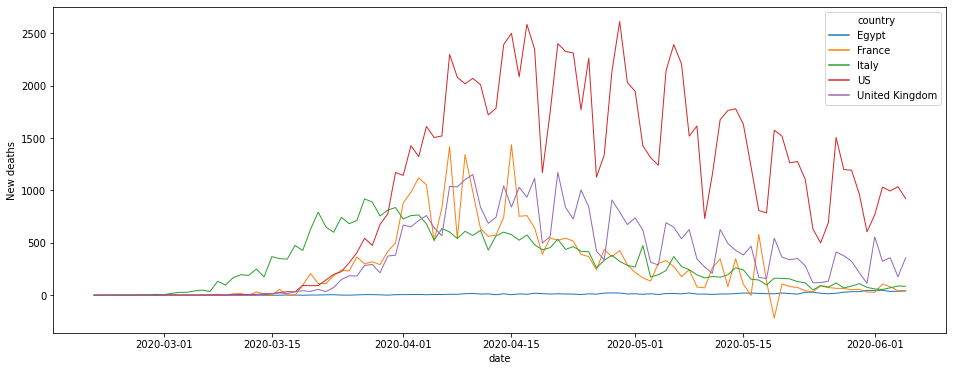

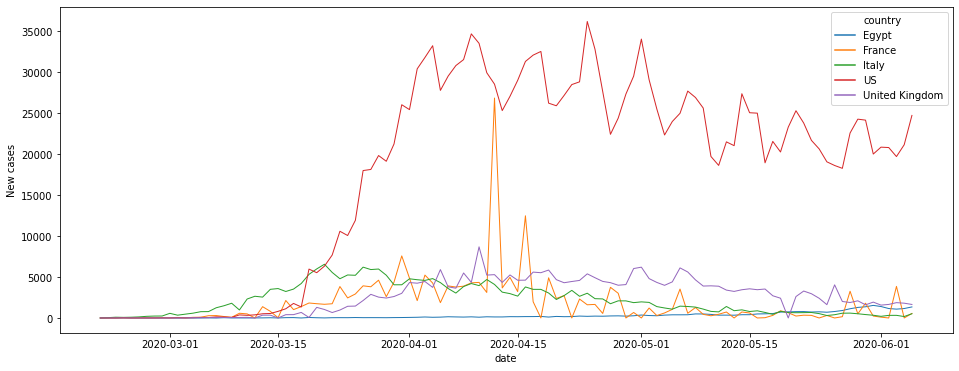

In [17]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="New deaths", hue="country",
                  estimator=None, lw=1,
                  data=covid19.df_daily.query("country in ('US', 'United Kingdom', 'France', 'Italy', 'Egypt') "))

plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="New cases", hue="country",
                  estimator=None, lw=1,
                  data=covid19.df_daily.query("country in ('US', 'United Kingdom', 'France', 'Italy', 'Egypt') "))